In [337]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [351]:
def batch_gradient_descent(theta, x, y, alpha=0.01, n_iter=100, print_cost=100):
    """
    Implements batch gradient descent using vectors and numpy.
    
    Arguments:
        theta     : (n + 1)-dimensional vector
        x         : (m, n + 1)-dimension matrix
        y         : (m, 1)-dimension vector
        n_iter    : number of iterations to run
        alpha     : learning rate
        print_cost: # iterations to print cost
        
    Returns:
        theta after n_iter iterations
    """
    m = y.shape[0]
    n = theta.shape[0] - 1
    
    plot_data = []
    
    # Feature scaling
    x_norm = np.sum(x, axis=0)
    x = x / x_norm
    
    assert(x.shape == (m, n + 1)), 'invalid shape for x' + str(x.shape)
    assert(y.shape == (m , 1)), 'invalid shape for y' + str(y.shape)
    
    for z in range(n_iter):  
        h = np.dot(x, theta)
        theta = theta - alpha / m * np.sum((h - y) * x, axis=0, keepdims=True).T   
        
        if (z % print_cost == 0):
            cost = 1 / (2 * m) * np.sum((h - y) ** 2)
            plot_data.append([z, cost])
            print(cost)
    
    # Plot the cost function
    plot_x = [item[0] for item in plot_data]
    plot_y = [item[1] for item in plot_data]
    plt.plot(plot_x, plot_y, 'ro--')
            
    return theta

In [356]:
y = np.array([[400], [330], [369], [232], [540]], dtype=np.float64)
x = np.array([[2104,3], [1600,3], [2400,3], [1416,2], [3000,4]], dtype=np.float64)
x = np.concatenate((np.ones((5,1), dtype=np.float64), x), axis=1)
theta = np.array([[40], [30], [50]], dtype=np.float64)

66004.56155294359
241.5365573191075
183.71269396782452
167.20860655390518
158.14057937866752
152.70580877004923
149.42416809158598
147.44143069530864
146.2434196110343
145.51955354613958


array([[-336.27683984],
       [ 713.35322125],
       [1494.0237326 ]])

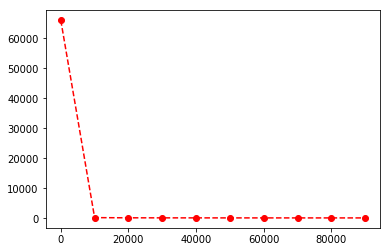

In [357]:
batch_gradient_descent(theta, x, y, n_iter=100000, alpha=0.1, print_cost=10000)